In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
import tensorflow as tf

from cnn_normalize import prepare_data, add_indicators, add_lags, split_data, normalize_data, prepare_sequences, split_train_and_test_data, get_cnn_data
from utils.chart import config_chart
from constants import SP500_TICKER

tf.keras.backend.clear_session()

---

## For **prepare_data** function

(6058, 7)
Open         float64
High         float64
Low          float64
Close        float64
Change       float64
Volume         int64
Direction      int64
dtype: object


,Open,High,Low,Close,Change,Volume,Direction
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,-14.030029,931800000,0
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,-55.799927,1009000000,0
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,2.689941,1085500000,1
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1.339966,1092300000,1
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,38.020020,1225200000,1
...,...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000,1
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000,1
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000,1


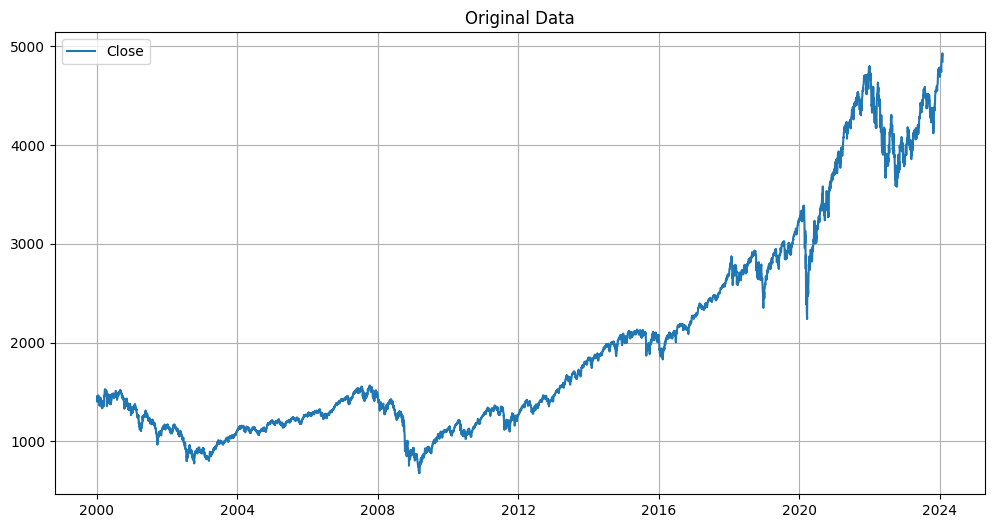

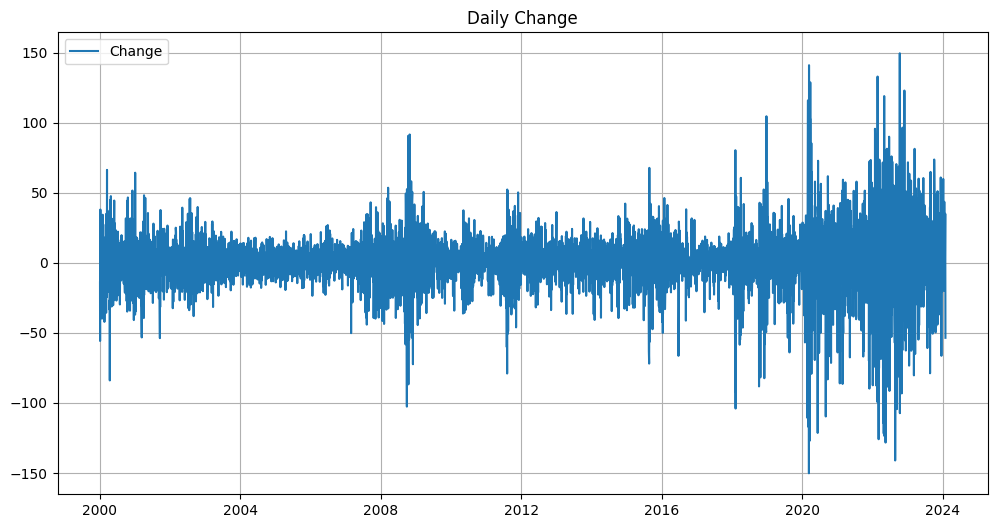

In [3]:
data = prepare_data(SP500_TICKER)


# Show data
print(data.shape)
print(data.dtypes)

plt = config_chart('Original Data')
plt.plot(data.Close)
plt.legend(['Close'])

plt = config_chart('Daily Change')
plt.plot(data.Change)
plt.legend(['Change'])

data

---

## For **add_indicators** function

(6009, 10)


,Open,High,Low,Close,Change,Volume,Direction,MA25,MA50,RSI
Date,,,,,,,,,,
2000-03-14,1383.619995,1395.150024,1359.150024,1359.150024,-24.469971,1094000000,0,-21.200371,-43.098975,43.912658
2000-03-15,1359.150024,1397.989990,1356.989990,1392.140015,32.989990,1302800000,1,13.772817,-8.847385,51.443509
2000-03-16,1392.150024,1458.469971,1392.150024,1458.469971,66.319946,1482300000,1,78.232373,56.301572,62.380629
2000-03-17,1458.469971,1477.329956,1453.319946,1464.469971,6.000000,1295100000,1,82.326772,61.054373,63.188360
2000-03-20,1464.469971,1470.300049,1448.489990,1456.630005,-7.839966,920800000,0,71.706406,52.150806,61.335200
...,...,...,...,...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000,1,118.863691,216.891133,72.932465
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000,1,110.769746,204.112783,72.142640
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000,1,138.546504,232.428145,75.458828


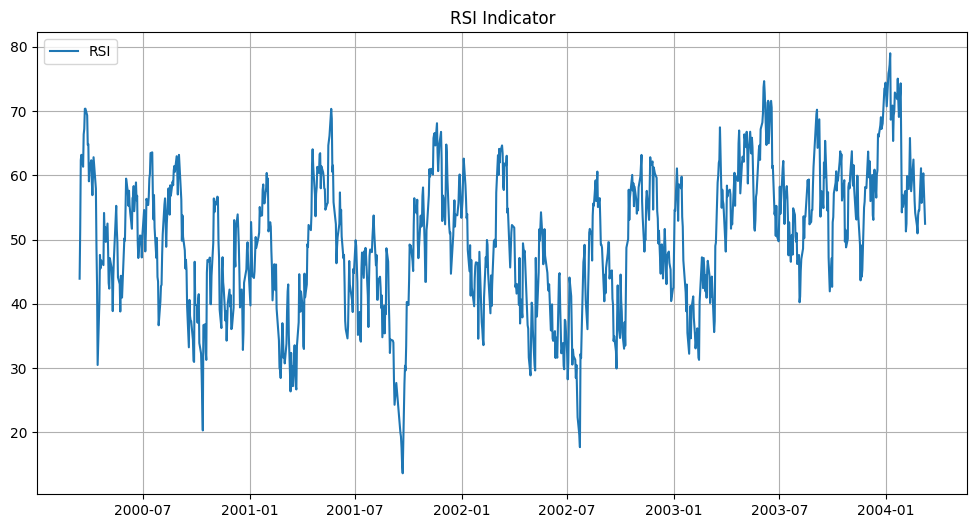

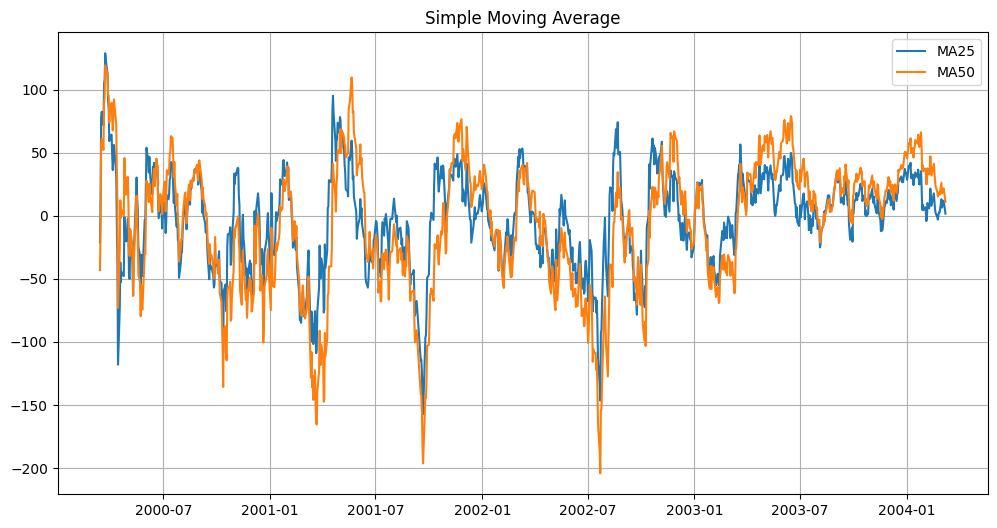

In [4]:
data = add_indicators(data)


# Show data
plt = config_chart('RSI Indicator')
plt.plot(data['RSI'][0:1000])
plt.legend(['RSI'])

plt = config_chart('Simple Moving Average')
plt.plot(data['MA25'][0:1000])
plt.plot(data['MA50'][0:1000])
plt.legend(['MA25', 'MA50'])

# plt = config_chart('Stochastic')
# plt.plot(data['Stochastic_K'][0:1000])
# plt.plot(data['Stochastic_D'][0:1000])
# plt.legend([''])

print(data.shape)

data

---

## For add_lags function

In [5]:
# data = add_lags(data)


# Show data
# data

---
## For split_data function

In [6]:
# indicators_train, indicators_test, target_train, target_test = split_data(extended_data)


# # Show data
# indicators_train.shape, indicators_test.shape, target_train.shape, target_test.shape

---

## For **normalize_data** function

In [7]:
data = normalize_data(data)


# Show data
# plt = config_chart('Normalized Data')
# plt.plot(data)
# plt.legend(['Open', 'High', 'Low', 'Close'])

data

,Open,High,Low,Close,Change,Volume,Direction,MA25,MA50,RSI
Date,,,,,,,,,,
2000-03-14,0.165859,0.165229,0.162928,0.160564,0.419503,0.066479,0.0,0.684467,0.661077,0.414434
2000-03-15,0.160097,0.165899,0.162420,0.168323,0.611190,0.085290,1.0,0.720304,0.688942,0.517530
2000-03-16,0.167868,0.180178,0.170694,0.183925,0.722378,0.101461,1.0,0.786357,0.741944,0.667256
2000-03-17,0.183485,0.184630,0.185089,0.185337,0.521151,0.084596,1.0,0.790553,0.745810,0.678314
2000-03-20,0.184898,0.182970,0.183952,0.183492,0.474981,0.050876,0.0,0.779670,0.738567,0.652945
...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.990762,0.992223,0.988956,0.992057,0.526155,0.330118,1.0,0.827992,0.872591,0.811709
2024-01-26,0.991292,0.994240,0.991811,0.991306,0.508007,0.270026,1.0,0.819698,0.862195,0.800896
2024-01-29,0.992243,0.999580,0.993206,1.000000,0.617828,0.285499,1.0,0.848162,0.885231,0.846294


----

## For **prepare_sequences** function

In [8]:
indicators, indicators_dates, target, target_dates = prepare_sequences(data)

# # Show data
print(indicators.shape)
print(indicators_dates.shape)
print(indicators[0])
print(indicators_dates[0])

print(target.shape)
print(target_dates.shape)
print(target[0])
print(target_dates[0])


(6008, 6)
(6008,)
[0.16585934 0.16056357 0.41950307 0.41443435 0.68446702 0.66107694]
2000-03-14T00:00:00.000000000
(6008,)
(6008,)
1.0
2000-03-15T00:00:00.000000000


---

## For **split_train_and_test_data** function

(4806, 6)
(4806,)
(601, 6)
(601,)
(601, 6)
(601,)


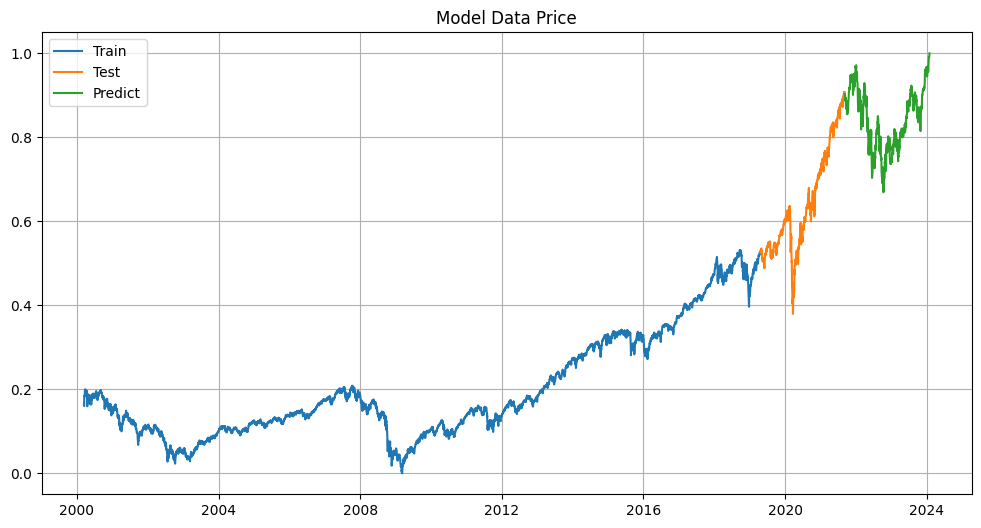

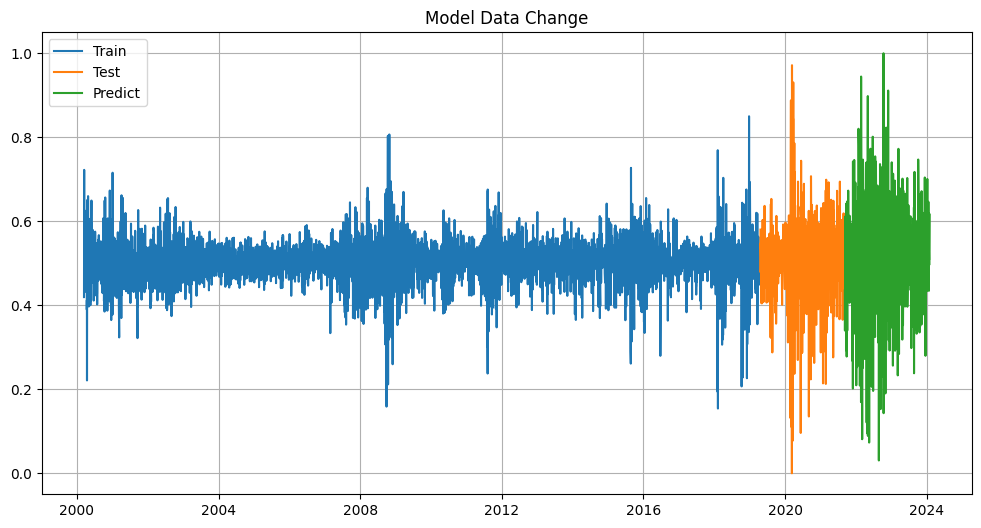

In [22]:
train, test, predict = split_train_and_test_data(indicators, target, indicators_dates, target_dates)


# Show data:
print(train["x"].shape)
print(train["y"].shape)

print(test["x"].shape)
print(test["y"].shape)

print(predict["x"].shape)
print(predict["y"].shape)

plt = config_chart('Model Data Price')
plt.plot(train['x_dates'], train['x'][:, 0])
plt.plot(test['x_dates'], test['x'][:, 0])
plt.plot(predict['x_dates'], predict['x'][:, 0])
plt.legend(['Train', 'Test', 'Predict'])

plt = config_chart('Model Data Change')
plt.plot(train['x_dates'], train['x'][:, 2])
plt.plot(test['x_dates'], test['x'][:, 2])
plt.plot(predict['x_dates'], predict['x'][:, 2])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [10]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

---

## For **get_lstm_data** function

In [17]:
train, test, predict = get_cnn_data(SP500_TICKER)

In [18]:
print(train["x"].shape) 
print(train["x"])

print(train["y"].shape)
print(train["y"])


(4806, 6)
[[0.16585934 0.16056357 0.41950307 0.41443435 0.68446702 0.66107694]
 [0.16009711 0.16832337 0.61118962 0.51752989 0.72030446 0.68894218]
 [0.16786801 0.18392528 0.72237842 0.66725642 0.78635692 0.74194383]
 ...
 [0.52671659 0.52310294 0.44912638 0.71679765 0.75176921 0.76796883]
 [0.52407214 0.52418025 0.50186876 0.73113131 0.75250503 0.76887324]
 [0.52265217 0.52487178 0.5317926  0.7405345  0.75201352 0.76797959]]
(4806,)
[1. 1. 1. ... 1. 1. 1.]


In [19]:
print(test["x"].shape) 
print(test["x"])

print(test["y"].shape)
print(test["y"])

(601, 6)
[[0.52529192 0.53091919 0.58016463 0.81301708 0.77422964 0.78522185]
 [0.53094584 0.52940676 0.47861693 0.77070367 0.76376003 0.77645269]
 [0.52976607 0.52915271 0.49172719 0.76342893 0.75847489 0.77262181]
 ...
 [0.90734487 0.90767747 0.51117715 0.72004173 0.78005389 0.80009821]
 [0.90804189 0.90405505 0.44992698 0.66251306 0.75882681 0.78367518]
 [0.90397039 0.90265316 0.48772415 0.64063645 0.7489929  0.77519058]]
(601,)
[0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1

In [20]:
print(predict["x"].shape) 
print(predict["x"])

print(predict["y"].shape)
print(predict["y"])

(601, 6)
[[0.90277654 0.897763   0.43528148 0.56763591 0.72397474 0.75499867]
 [0.90134008 0.88960105 0.33987312 0.46437564 0.6872092  0.72414795]
 [0.89377879 0.89198848 0.48085179 0.49405102 0.69628969 0.72998441]
 ...
 [0.99129188 0.9913064  0.5080073  0.800896   0.81969835 0.86219502]
 [0.99224324 1.         0.61782823 0.84629382 0.84816152 0.88523086]
 [1.         0.99930377 0.49806608 0.83579578 0.83782344 0.875955  ]]
(601,)
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0

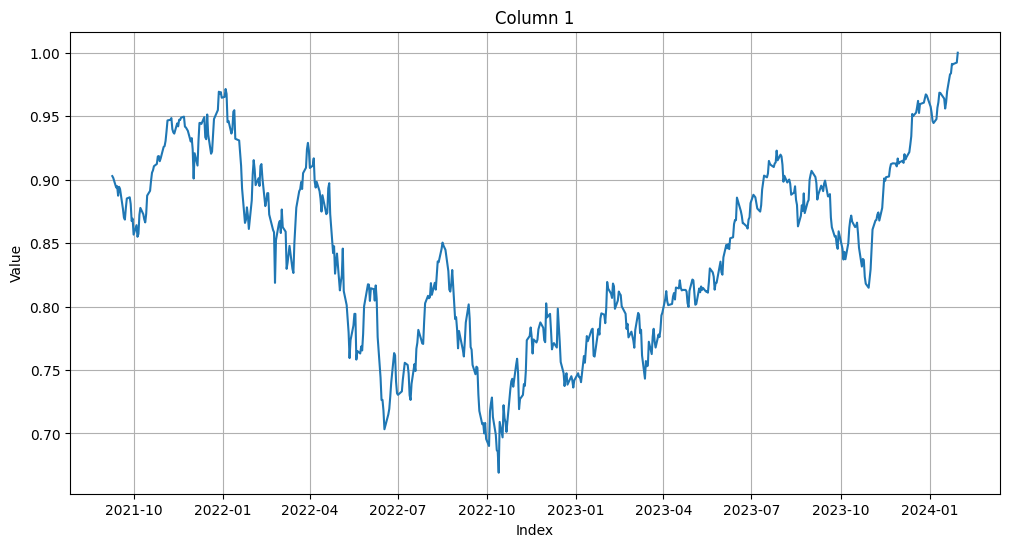

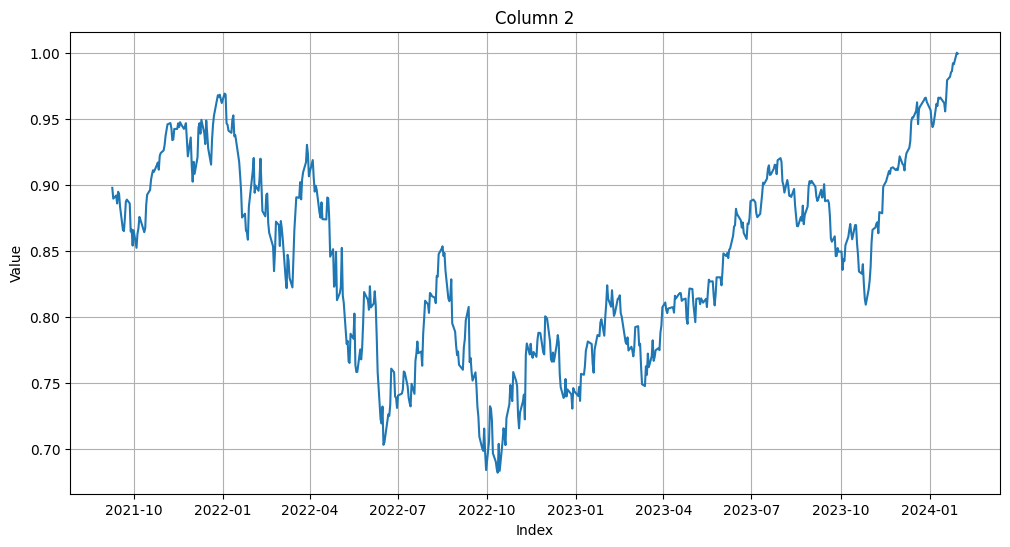

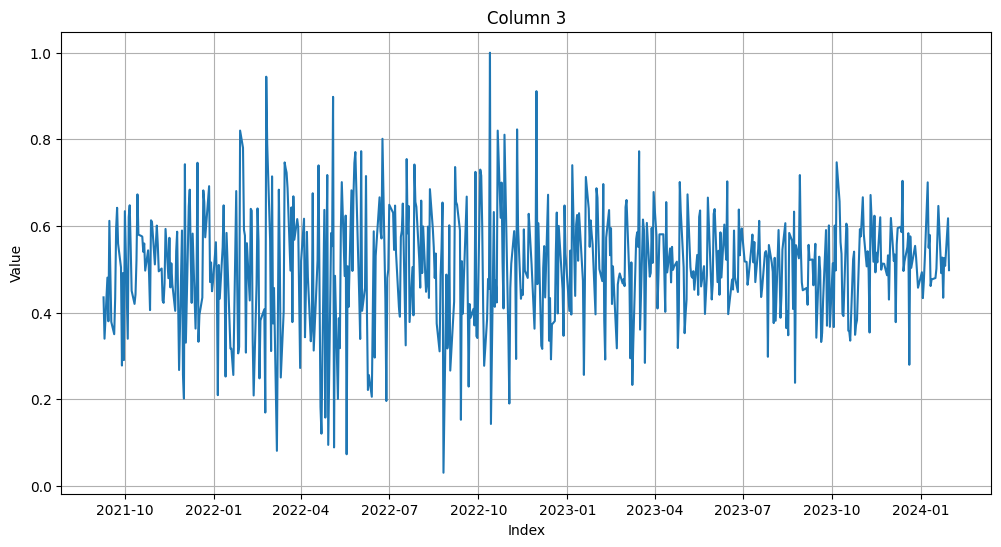

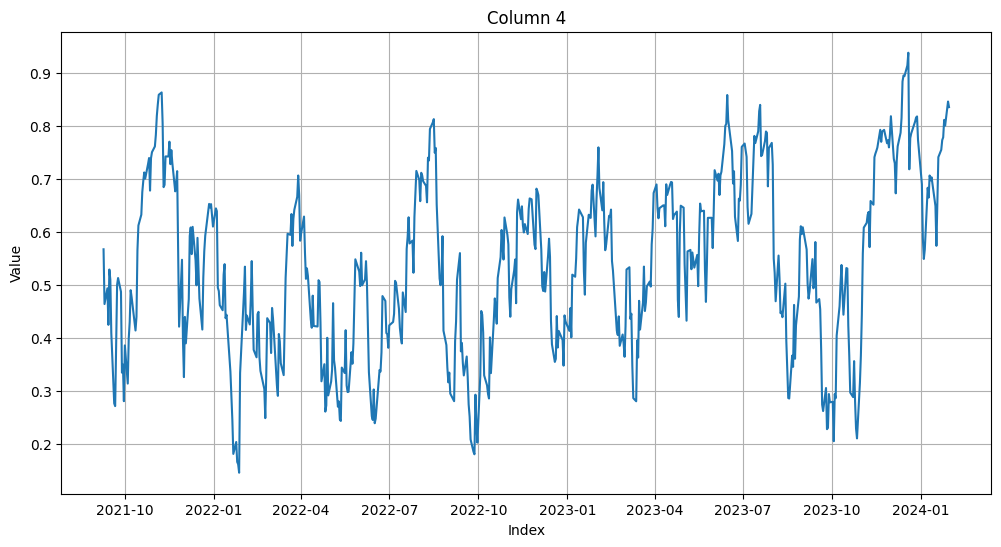

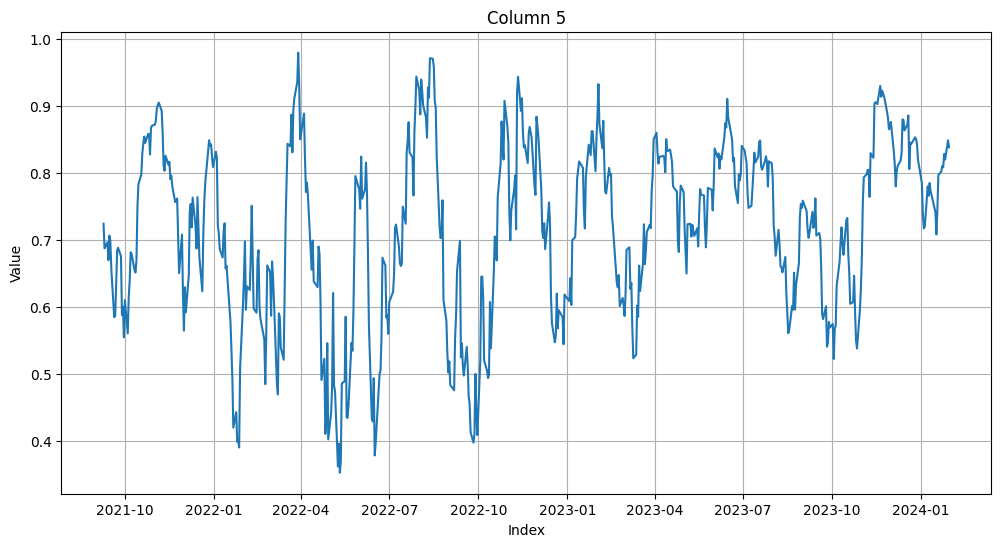

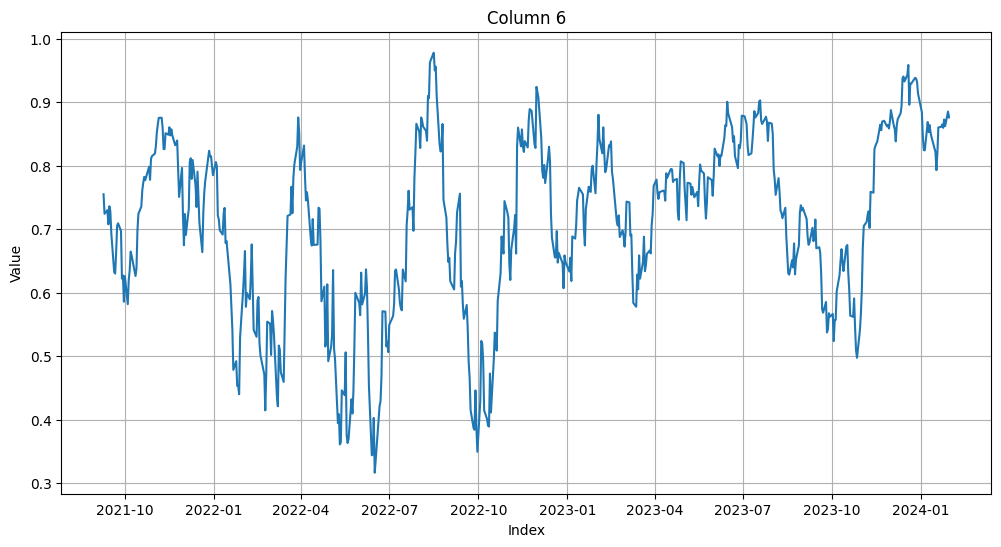

In [23]:
num_columns = predict["x"].shape[1]  # Get the number of columns
for i in range(num_columns):
    plt = config_chart('Model Data')
    plt.plot(predict['x_dates'], predict["x"][:, i])
    plt.title(f'Column {i+1}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()